In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import os
os.getcwd()

'/content'

In [5]:
#Create DataFrame
df=pd.read_csv('/content/drive/MyDrive/salary.csv')
df

,Unnamed: 0,age,Workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,1114,34,Private,290763,HS-grad,9,Divorced,Handlers-cleaners,Own-child,White,Female,0,0,40,United-States,0
1028,1116,36,Private,51100,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
1029,1117,41,Private,227644,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,50,United-States,0
1030,1118,58,Local-gov,205267,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40,United-States,1


In [6]:
#To check null values
df.isnull().sum()

Unnamed: 0        0
age               0
Workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

In [7]:
#To check datatypes
df.dtypes

Unnamed: 0         int64
age                int64
Workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
Income             int64
dtype: object

In [8]:
#To check duplicate rows
df.duplicated().sum()

0

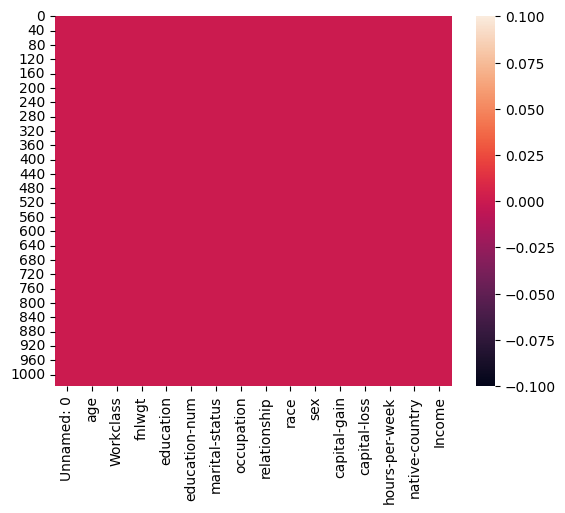

In [9]:
#Visualize null values
sb.heatmap(df.isnull())
plt.show()

In [10]:
#To delete column
df.drop('Unnamed: 0',axis=1,inplace=True)

In [11]:
#Separate object datatype and numeric data type
df_obj=df.select_dtypes('object')
df_num=df.select_dtypes('int64')

In [12]:
#Check datatype
df_obj.dtypes

Workclass         object
education         object
marital-status    object
occupation        object
relationship      object
race              object
sex               object
native-country    object
dtype: object

In [13]:
#Check datatype
df_num.dtypes

age               int64
fnlwgt            int64
education-num     int64
capital-gain      int64
capital-loss      int64
hours-per-week    int64
Income            int64
dtype: object

In [14]:
column=df_obj.columns
column

Index(['Workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object')

In [15]:
#Apply LabelEncoder for object type data
from sklearn.preprocessing import LabelEncoder
for col in column:
    le=LabelEncoder()
    df_obj[col]=le.fit_transform(df_obj[col])

In [16]:
df_obj.dtypes

Workclass         int64
education         int64
marital-status    int64
occupation        int64
relationship      int64
race              int64
sex               int64
native-country    int64
dtype: object

In [17]:
#Now merge df_obj and df_num in new dataframe
df_new=pd.concat([df_obj,df_num],axis=1)

In [18]:
df_new.dtypes

Workclass         int64
education         int64
marital-status    int64
occupation        int64
relationship      int64
race              int64
sex               int64
native-country    int64
age               int64
fnlwgt            int64
education-num     int64
capital-gain      int64
capital-loss      int64
hours-per-week    int64
Income            int64
dtype: object

In [19]:
#Drop column
df_new.drop('education-num',axis=1,inplace=True)

In [20]:
#Check datatypes
df_new.dtypes

Workclass         int64
education         int64
marital-status    int64
occupation        int64
relationship      int64
race              int64
sex               int64
native-country    int64
age               int64
fnlwgt            int64
capital-gain      int64
capital-loss      int64
hours-per-week    int64
Income            int64
dtype: object

In [21]:
df_new['Income'].value_counts()

0    778
1    254
Name: Income, dtype: int64

In [22]:
#Separate input and output
X=df_new.drop('Income',axis=1)
Y=df_new['Income']

In [23]:
X.head()

,Workclass,education,marital-status,occupation,relationship,race,sex,native-country,age,fnlwgt,capital-gain,capital-loss,hours-per-week
0,5,9,4,0,1,4,1,28,39,77516,2174,0,40
1,4,9,2,3,0,4,1,28,50,83311,0,0,13
2,2,11,0,5,1,4,1,28,38,215646,0,0,40
3,2,1,2,5,0,2,1,28,53,234721,0,0,40
4,2,9,2,9,5,2,0,4,28,338409,0,0,40


In [24]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Income, dtype: int64

In [25]:
#Train test split 70% and 30% data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [26]:
#Now apply StandardScaler
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [27]:
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [28]:
X_train

array([[-0.24904966, -0.93217405, -0.37685422, ..., -0.24796148,
        -0.2300775 , -0.10196177],
       [-0.24904966,  0.17523798,  0.95691415, ...,  1.38249871,
        -0.2300775 ,  0.77130512],
       [-0.24904966, -0.37846803,  0.95691415, ..., -0.24796148,
        -0.2300775 , -1.84849555],
       ...,
       [-1.2824626 , -0.65532104, -1.71062259, ..., -0.24796148,
        -0.2300775 ,  1.29526525],
       [ 1.81777623,  0.17523798,  0.95691415, ..., -0.24796148,
        -0.2300775 ,  0.07269161],
       [ 1.81777623,  0.17523798, -0.37685422, ..., -0.24796148,
        -0.2300775 , -0.10196177]])

In [29]:
X_test

array([[ 1.81777623,  1.28265001, -0.37685422, ..., -0.24796148,
        -0.2300775 ,  0.33467167],
       [-0.24904966, -2.59329209, -0.37685422, ..., -0.24796148,
        -0.2300775 , -0.10196177],
       [-0.24904966,  1.00579701, -0.37685422, ..., -0.24796148,
         5.61984356, -0.10196177],
       ...,
       [-0.24904966,  1.28265001, -0.37685422, ..., -0.24796148,
        -0.2300775 ,  0.77130512],
       [-0.24904966,  0.17523798, -1.71062259, ..., -0.24796148,
        -0.2300775 , -0.10196177],
       [ 1.81777623,  0.17523798,  0.95691415, ..., -0.24796148,
        -0.2300775 , -0.10196177]])

In [30]:
X_train.shape,Y_train.shape

((722, 13), (722,))

In [31]:
X_test.shape,Y_test.shape

((310, 13), (310,))

In [32]:
Y_train.value_counts()

0    540
1    182
Name: Income, dtype: int64

In [33]:
# 182*2=364 less than value counts of 0 (540).
#The data is imbalance
#Use RandomOverSampler: convert minority class to majority class


In [34]:
#First install imblearn package
#!pip install imblearn

In [35]:
from imblearn.over_sampling import RandomOverSampler


In [36]:
ros=RandomOverSampler(random_state=1)

In [37]:
X_train1,Y_train1=ros.fit_resample(X_train,Y_train)

In [38]:
Y_train1.value_counts()

1    540
0    540
Name: Income, dtype: int64

In [39]:
#Apply RandomOverSampler on training input and output
X_train1.shape,Y_train1.shape

((1080, 13), (1080,))

In [40]:
Y_test.value_counts()

0    238
1     72
Name: Income, dtype: int64

In [41]:
#Similar apply RandomOverSampler on testing data
X_test1,Y_test1=ros.fit_resample(X_test,Y_test)

In [42]:
Y_test1.value_counts()

0    238
1    238
Name: Income, dtype: int64

In [43]:
def create_model(model):
    model.fit(X_train1,Y_train1)
    Y_pred=model.predict(X_test1)
    print(confusion_matrix(Y_test1,Y_pred))
    print(classification_report(Y_test1,Y_pred))
    return model

In [44]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [45]:
#first use LogisticRegression algorithm
from sklearn.linear_model import LogisticRegression
#create object of LogisticRegression class
lr=LogisticRegression()

In [46]:
#call user defined function and passing the parameter lr (object of LogisticRegression  class)
lr=create_model(lr)

[[172  66]
 [ 83 155]]
              precision    recall  f1-score   support

           0       0.67      0.72      0.70       238
           1       0.70      0.65      0.68       238

    accuracy                           0.69       476
   macro avg       0.69      0.69      0.69       476
weighted avg       0.69      0.69      0.69       476



In [47]:
#Using LogisticRegression (f1-score of 0=70% and 1=68%) and accuracy=69%


In [48]:
#Train model with the DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
#create the object of DecisionTreeClassifier class by default use method gini index
dt=DecisionTreeClassifier(random_state=1)

In [49]:
#Call function
dt=create_model(dt)

[[208  30]
 [131 107]]
              precision    recall  f1-score   support

           0       0.61      0.87      0.72       238
           1       0.78      0.45      0.57       238

    accuracy                           0.66       476
   macro avg       0.70      0.66      0.65       476
weighted avg       0.70      0.66      0.65       476



In [50]:
#Using DecisionTreeClassifier gini index, (f1-score of 0=72% and 1=57%) and accuracy=66%

In [51]:
#To check information gain from each input
#Use inbuilt attributes feature_importances_  of DecisionTreeClassifier class
dict={"Input Columns":X.columns,"IG":dt.feature_importances_}
df1=pd.DataFrame(dict)
df1.sort_values("IG",ascending=False)

,Input Columns,IG
2,marital-status,0.290763
8,age,0.173708
9,fnlwgt,0.159726
1,education,0.128571
12,hours-per-week,0.086905
3,occupation,0.063630
10,capital-gain,0.033503
0,Workclass,0.032237
5,race,0.011481
7,native-country,0.008722


In [52]:
#use Entropy method with decisiontree class
dt1=DecisionTreeClassifier(random_state=1,criterion="entropy")
print("confusion matrix and classification report")
dt1=create_model(dt1)

confusion matrix and classification report
[[211  27]
 [126 112]]
              precision    recall  f1-score   support

           0       0.63      0.89      0.73       238
           1       0.81      0.47      0.59       238

    accuracy                           0.68       476
   macro avg       0.72      0.68      0.66       476
weighted avg       0.72      0.68      0.66       476



In [53]:
#Using DecisionTreeClassifier entropy, (f1-score of 0=73% and 1=59%) and accuracy=68%

In [54]:
#To check information gain from each input
dict={"Input Columns":X.columns,"IG":dt1.feature_importances_}
df1=pd.DataFrame(dict)
df1.sort_values("IG",ascending=False)

,Input Columns,IG
2,marital-status,0.226199
9,fnlwgt,0.165472
8,age,0.158532
1,education,0.107763
12,hours-per-week,0.106291
3,occupation,0.091284
10,capital-gain,0.059362
0,Workclass,0.036827
4,relationship,0.015373
11,capital-loss,0.014082


In [55]:
#Now we have to apply Pruning technique to reduce overfitting of model
#There are 2 types of Pruning Technique of DecisionTreeClassifier class
#1.max_depth : inbuilt parameter
#2.min_samples_leaf : inbuilt parameter

In [56]:
'''for i in range(1,9):
  dt1=DecisionTreeClassifier(random_state=1,max_depth=i)
  print("Max depth:",i)
  print("Confusion Matrix and Classification Report")
  dt1=create_model(dt1)'''

'for i in range(1,9):\n  dt1=DecisionTreeClassifier(random_state=1,max_depth=i)\n  print("Max depth:",i)\n  print("Confusion Matrix and Classification Report")\n  dt1=create_model(dt1)'

In [57]:
#Create the object of DecisionTreeClassifier class by default use method gini index with max_depth
dt1=DecisionTreeClassifier(random_state=1,max_depth=6)
print("Confusion Matrix and Classification Report")
dt1=create_model(dt1)

Confusion Matrix and Classification Report
[[179  59]
 [ 37 201]]
              precision    recall  f1-score   support

           0       0.83      0.75      0.79       238
           1       0.77      0.84      0.81       238

    accuracy                           0.80       476
   macro avg       0.80      0.80      0.80       476
weighted avg       0.80      0.80      0.80       476



In [58]:
#DecisionTreeClassifier using max_depth (gini index) , (f1-score of 0=79% and 1=81%) and accuracy=80%

In [59]:
'''for i in range(1,9):
  dt1=DecisionTreeClassifier(random_state=1,max_depth=i,criterion="entropy")
  print("Max Depth:",i)
  print("Confusion Matrix and Classification Report")
  dt1=create_model(dt1)'''

'for i in range(1,9):\n  dt1=DecisionTreeClassifier(random_state=1,max_depth=i,criterion="entropy")\n  print("Max Depth:",i)\n  print("Confusion Matrix and Classification Report")\n  dt1=create_model(dt1)'

In [60]:
#Create the object of DecisionTreeClassifier class by entropy with max_depth
dt1=DecisionTreeClassifier(random_state=1,max_depth=6,criterion="entropy")
print("confusion matrix and classification report")
dt1=create_model(dt1)

confusion matrix and classification report
[[172  66]
 [ 29 209]]
              precision    recall  f1-score   support

           0       0.86      0.72      0.78       238
           1       0.76      0.88      0.81       238

    accuracy                           0.80       476
   macro avg       0.81      0.80      0.80       476
weighted avg       0.81      0.80      0.80       476



In [61]:
#DecisionTreeClassifier using max_depth (entropy) , (f1-score of 0=78% and 1=81%) and accuracy=80%

In [62]:
'''for i in range(45,101):
  dt1=DecisionTreeClassifier(random_state=1,min_samples_leaf=i)
  print("Min Sample Leaf: ",i)
  print("Confusion Matrix and Classification Report")
  dt1=create_model(dt1)'''

'for i in range(45,101):\n  dt1=DecisionTreeClassifier(random_state=1,min_samples_leaf=i)\n  print("Min Sample Leaf: ",i)\n  print("Confusion Matrix and Classification Report")\n  dt1=create_model(dt1)'

In [63]:
#Create the object of DecisionTreeClassifier class by default use method gini index with min_samples_leaf
dt1=DecisionTreeClassifier(random_state=1,min_samples_leaf=47)
print("Confusion Matrix and Classification Report")
dt1=create_model(dt1)

Confusion Matrix and Classification Report
[[163  75]
 [ 34 204]]
              precision    recall  f1-score   support

           0       0.83      0.68      0.75       238
           1       0.73      0.86      0.79       238

    accuracy                           0.77       476
   macro avg       0.78      0.77      0.77       476
weighted avg       0.78      0.77      0.77       476



In [64]:
#DecisionTreeClassifier using min_samples_leaf (gini index) , (f1-score of 0=75% and 1=79%) and accuracy=77%

In [65]:
'''for i in range(45,101):
  dt1=DecisionTreeClassifier(random_state=1,min_samples_leaf=i,criterion="entropy")
  print("Min Sample Leaf: ",i)
  print("Confusion Matrix and Classification Report")
  dt1=create_model(dt1)'''

'for i in range(45,101):\n  dt1=DecisionTreeClassifier(random_state=1,min_samples_leaf=i,criterion="entropy")\n  print("Min Sample Leaf: ",i)\n  print("Confusion Matrix and Classification Report")\n  dt1=create_model(dt1)'

In [66]:
#Create the object of DecisionTreeClassifier class by entropy with min_samples_leaf
dt1=DecisionTreeClassifier(random_state=1,min_samples_leaf=47,criterion="entropy")
dt1=create_model(dt1)

[[163  75]
 [ 34 204]]
              precision    recall  f1-score   support

           0       0.83      0.68      0.75       238
           1       0.73      0.86      0.79       238

    accuracy                           0.77       476
   macro avg       0.78      0.77      0.77       476
weighted avg       0.78      0.77      0.77       476



In [67]:
#DecisionTreeClassifier using min_samples_leaf (entropy) , (f1-score of 0=75% and 1=79%) and accuracy=77%

In [68]:
#Now apply Ensembling technique using RandomForestTree
from sklearn.ensemble import RandomForestClassifier

In [69]:
'''for i in range(10,101):
  rfc=RandomForestClassifier(random_state=1,n_estimators=i)
  print("NO.of decision tree:",i)
  rfc=create_model(rfc)'''

'for i in range(10,101):\n  rfc=RandomForestClassifier(random_state=1,n_estimators=i)\n  print("NO.of decision tree:",i)\n  rfc=create_model(rfc)'

In [70]:
#Create object of RandomForestClassifier  class and pass the value of n_estimators parameters =23
rfc=RandomForestClassifier(random_state=1,n_estimators=23)
rfc=create_model(rfc)

[[214  24]
 [ 82 156]]
              precision    recall  f1-score   support

           0       0.72      0.90      0.80       238
           1       0.87      0.66      0.75       238

    accuracy                           0.78       476
   macro avg       0.79      0.78      0.77       476
weighted avg       0.79      0.78      0.77       476



In [71]:
#Using RandomForestTree , (f1-score of 0=80% and 1=75%) and accuracy=78%

In [72]:
#Now apply AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

In [73]:
'''for i in range(1,17):
  ada=AdaBoostClassifier(random_state=1,n_estimators=i)
  print("No.of  decision stump means no.of input :",i)
  ada=create_model(ada)'''

'for i in range(1,17):\n  ada=AdaBoostClassifier(random_state=1,n_estimators=i)\n  print("No.of  decision stump means no.of input :",i)\n  ada=create_model(ada)'

In [74]:
#Create object of AdaBoostClassifier class and passing the parameter, n_estimators(means how many decision stump)
#decision stump depends on input(information gain)
ada=AdaBoostClassifier(random_state=1,n_estimators=11)
ada=create_model(ada)
ada.feature_importances_

[[190  48]
 [ 60 178]]
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       238
           1       0.79      0.75      0.77       238

    accuracy                           0.77       476
   macro avg       0.77      0.77      0.77       476
weighted avg       0.77      0.77      0.77       476



array([0.09090909, 0.18181818, 0.18181818, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.18181818, 0.        ,
       0.09090909, 0.09090909, 0.18181818])

In [75]:
#Using AdaBoostClassifier, (f1-score of 0=78% and 1=77%) and accuracy=77%

In [76]:
#Now apply GradientBoostingclassifier
from sklearn.ensemble import GradientBoostingClassifier

In [77]:
#create object of GradientBoostingClassifier  class and passing the parameter
#n_estimators means how many decision tree
#min 10 decision tree and max =100 decision tree
#.2 .Gradient Boosting Algorithm
'''for i in range(10,101):
  gbc=GradientBoostingClassifier(random_state=1,n_estimators=i)
  print("No.of decision tree:",i)
  gbc=create_model(gbc)'''

'for i in range(10,101):\n  gbc=GradientBoostingClassifier(random_state=1,n_estimators=i)\n  print("No.of decision tree:",i)\n  gbc=create_model(gbc)'

In [78]:
#create object of GradientBoostingClassifier
gbc=GradientBoostingClassifier(random_state=1,n_estimators=45)
gbc=create_model(gbc)

[[187  51]
 [ 45 193]]
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       238
           1       0.79      0.81      0.80       238

    accuracy                           0.80       476
   macro avg       0.80      0.80      0.80       476
weighted avg       0.80      0.80      0.80       476



In [79]:
#Using GradientBoostingClassifier, (f1-score of 0=80% and 1=80%) and accuracy=80%

In [80]:
#Now apply ExtremeGradientBoost(XGB)
from xgboost import XGBClassifier

In [81]:
'''for i in range(10,101):
  xgb=XGBClassifier(random_state=1,n_estimators=i,reg_alpha=1)
  print("No.of Estimators means tree:",i)
  xgb=create_model(xgb)'''

'for i in range(10,101):\n  xgb=XGBClassifier(random_state=1,n_estimators=i,reg_alpha=1)\n  print("No.of Estimators means tree:",i)\n  xgb=create_model(xgb)'

In [82]:
#Create object of XGBClassifier class and passing the parameter n_estimators means train how
#many decision tree and passing the second parameter reg_alpha=1 means true means handle overfitting of model
xgb=XGBClassifier(random_state=1,n_estimators=10,reg_alpha=1)
xgb=create_model(xgb)

[[195  43]
 [ 45 193]]
              precision    recall  f1-score   support

           0       0.81      0.82      0.82       238
           1       0.82      0.81      0.81       238

    accuracy                           0.82       476
   macro avg       0.82      0.82      0.82       476
weighted avg       0.82      0.82      0.82       476



In [83]:
#Using XGBClassifier, (f1-score of 0=82% and 1=81%) and accuracy=82%

In [84]:
#Now apply SVM support vector machine technique
from sklearn.svm import LinearSVC

In [85]:
svc=LinearSVC(random_state=1)
svc=create_model(svc)

[[172  66]
 [ 83 155]]
              precision    recall  f1-score   support

           0       0.67      0.72      0.70       238
           1       0.70      0.65      0.68       238

    accuracy                           0.69       476
   macro avg       0.69      0.69      0.69       476
weighted avg       0.69      0.69      0.69       476



In [86]:
svc1=LinearSVC(random_state=1,C=0.01)
svc1=create_model(svc1)

[[174  64]
 [ 79 159]]
              precision    recall  f1-score   support

           0       0.69      0.73      0.71       238
           1       0.71      0.67      0.69       238

    accuracy                           0.70       476
   macro avg       0.70      0.70      0.70       476
weighted avg       0.70      0.70      0.70       476



In [87]:
#Using SVM, (f1-score of 0=71% and 1=69%) and accuracy=70%

In [88]:
#Polynomial kernel function for non linear data
from sklearn.svm import SVC
p_svc=SVC(random_state=1,kernel='poly')
p_svc=create_model(p_svc)

[[193  45]
 [122 116]]
              precision    recall  f1-score   support

           0       0.61      0.81      0.70       238
           1       0.72      0.49      0.58       238

    accuracy                           0.65       476
   macro avg       0.67      0.65      0.64       476
weighted avg       0.67      0.65      0.64       476



In [89]:
#Using polynomial kernel function of SVM, (f1-score of 0=70% and 1=58%) and accuracy=65%

In [90]:
#Radial basis kernel function for non linear data
r_svc=SVC(random_state=1,kernel='rbf')
r_svc=create_model(r_svc)

[[180  58]
 [ 69 169]]
              precision    recall  f1-score   support

           0       0.72      0.76      0.74       238
           1       0.74      0.71      0.73       238

    accuracy                           0.73       476
   macro avg       0.73      0.73      0.73       476
weighted avg       0.73      0.73      0.73       476



In [91]:
#Using radial basis kernel of SVM, (f1-score of 0=74% and 1=73%) and accuracy=73%

In [92]:
#CONCLUSION:-

#LogisticRegression:
# f1-score: 0=70% and 1=68% and accuracy=69%

#DecisionTreeClassifier gini index:
# f1-score: 0=72% and 1=57% and accuracy=66%

#DecisionTreeClassifier entropy:
# f1-score: 0=73% and 1=59% and accuracy=68%

#DecisionTreeClassifier using max_depth (gini index):
# f1-score: 0=79% and 1=81% and accuracy=80%

#DecisionTreeClassifier using max_depth (entropy):
# f1-score: 0=78% and 1=81% and accuracy=80%

#DecisionTreeClassifier using min_samples_leaf (gini index):
# f1-score: 0=75% and 1=79% and accuracy=77%

#DecisionTreeClassifier using min_samples_leaf (entropy):
# f1-score: 0=75% and 1=79% and accuracy=77%

#RandomForestTree:
# f1-score: 0=80% and 1=75% and accuracy=78%

#AdaBoostClassifier:
# f1-score: 0=78% and 1=77% and accuracy=77%

#GradientBoostingClassifier:
# f1-score: 0=80% and 1=80% and accuracy=80%

#XGBClassifier:
# f1-score: 0=82% and 1=81% and accuracy=82%

#SVM:
# f1-score: 0=71% and 1=69% and accuracy=70%

#Polynomial kernel function of SVM:
# f1-score: 0=70% and 1=58% and accuracy=65%

#Radial basis kernel of SVM:
# f1-score: 0=74% and 1=73% and accuracy=73%

#Best algorithm for salary.csv dataset is XGBClassifier class
# f1-score: 0=82% and 1=81% and accuracy=82%